<a href="https://colab.research.google.com/github/bok-h22/ML/blob/master/2_%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8_%ED%8F%89%EA%B0%80_%EB%B0%A9%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#암 데이터, 분류모델 평가 방법

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

cancer = load_breast_cancer()

data = cancer.data
target = cancer.target
feature_names = cancer.feature_names

# 데이터 프레임 생성
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# 모델 생성 목적을 암을 예측하기 위해서 만들 것이라서 종양을 0으로, 암을 1로 바꿔주기
tumor = df.loc[df['target'] == 1].copy()
cancer = df.loc[df['target'] == 0].copy()

tumor['target'] = 0
cancer['target'] = 1

sample = pd.concat([tumor, cancer[:30]], sort=True)

sample['target'].value_counts()

0    357
1     30
Name: target, dtype: int64

In [ ]:
#데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    sample.drop("target", axis = 1),
    sample["target"],
    random_state = 42
)

In [ ]:
#로지스틱회귀분석 (Regression)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

lr_pred = model.predict(X_test)

In [ ]:
#정확도 확인
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_pred)

0.9690721649484536

In [ ]:
#정오행렬
from sklearn.metrics import confusion_matrix

lr_conf_matrix = confusion_matrix(y_test, lr_pred)
print(f"모델의 정오 행렬 : \n{lr_conf_matrix}")

모델의 정오 행렬 : 
[[87  1]
 [ 2  7]]


Text(0.5, 1.0, "model's confusion matrix")

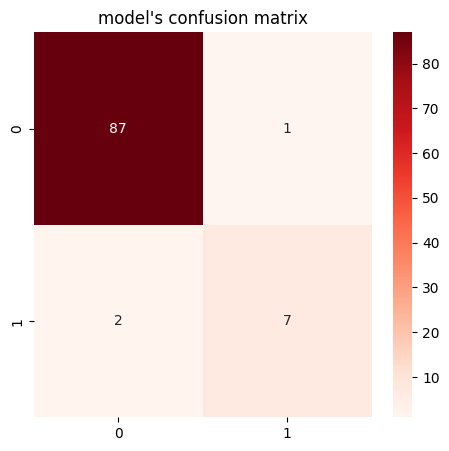

In [ ]:
#시각화
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(121)
ax = sns.heatmap(
    lr_conf_matrix,
    annot=True,
    cmap="Reds"
)
ax.set_title("model's confusion matrix")

정밀도 : TP / (FP + TP)
- 양성으로 예측을 했을 때, 실제 맞은 비율

재현율 : TP / (FN + TP)
- 실제 양성인 데이터를 맞춘 비율

In [ ]:
from sklearn.metrics import precision_score, recall_score
print(f"정밀도 : {precision_score(y_test,lr_pred):.3f}")
print(f"재현율 : {recall_score(y_test,lr_pred):.3f}")

정밀도 : 0.875
재현율 : 0.778


In [ ]:
#예측확률 확인
lr_pred_proba = model.predict_proba(X_test)
lr_pred = model.predict(X_test)

print(lr_pred_proba[:3])
print(lr_pred[:3])

[[9.99263508e-01 7.36491915e-04]
 [9.99303414e-01 6.96586175e-04]
 [9.99999986e-01 1.40395416e-08]]
[0 0 0]


In [ ]:
#임계값이 .50일 때(기본값), 정오 행렬 확인
lr_pred_proba_1 = model.predict_proba(X_test)[:, 1].reshape(-1,1) #배열 편집
                                                                  #행벡터를 열벡터로 만들어주기

#배열 편집 예시
arr = np.array([[1,2],
               [3,4],
               [5,6]])

arr[:, 1].reshape(-1,1)

array([[2],
       [4],
       [6]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test, pred, ax=None):
  confusion = confusion_matrix( y_test, pred)
  precision = precision_score(y_test , pred)
  recall = recall_score(y_test , pred)
  accuracy = accuracy_score(y_test, pred)
  hmap_ax = sns.heatmap(
    confusion,
    annot=True,
    cmap="Reds",
    ax=ax
  )
  hmap_ax.set_title('A: {0:.4f}, P: {1:.4f}, R: {2:.4f}'.format(accuracy , precision ,recall))

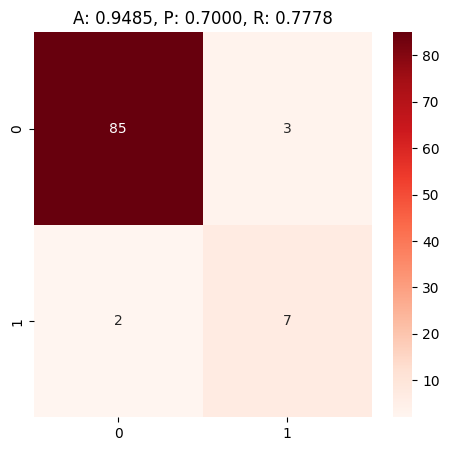

In [ ]:
#임계값을 변화시키면서, 정오 행렬 확인
from sklearn.preprocessing import Binarizer

lr_pred_proba_1 = model.predict_proba(X_test)[:, 1].reshape(-1,1) #배열 편집
                                                                  #행벡터를 열벡터로 만들어주기
binarizer = Binarizer(threshold=0.1)
custom_predict = binarizer.fit_transform(lr_pred_proba_1)

plt.figure(figsize=(12, 5))
plt.subplot(121)
get_clf_eval(y_test, custom_predict)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


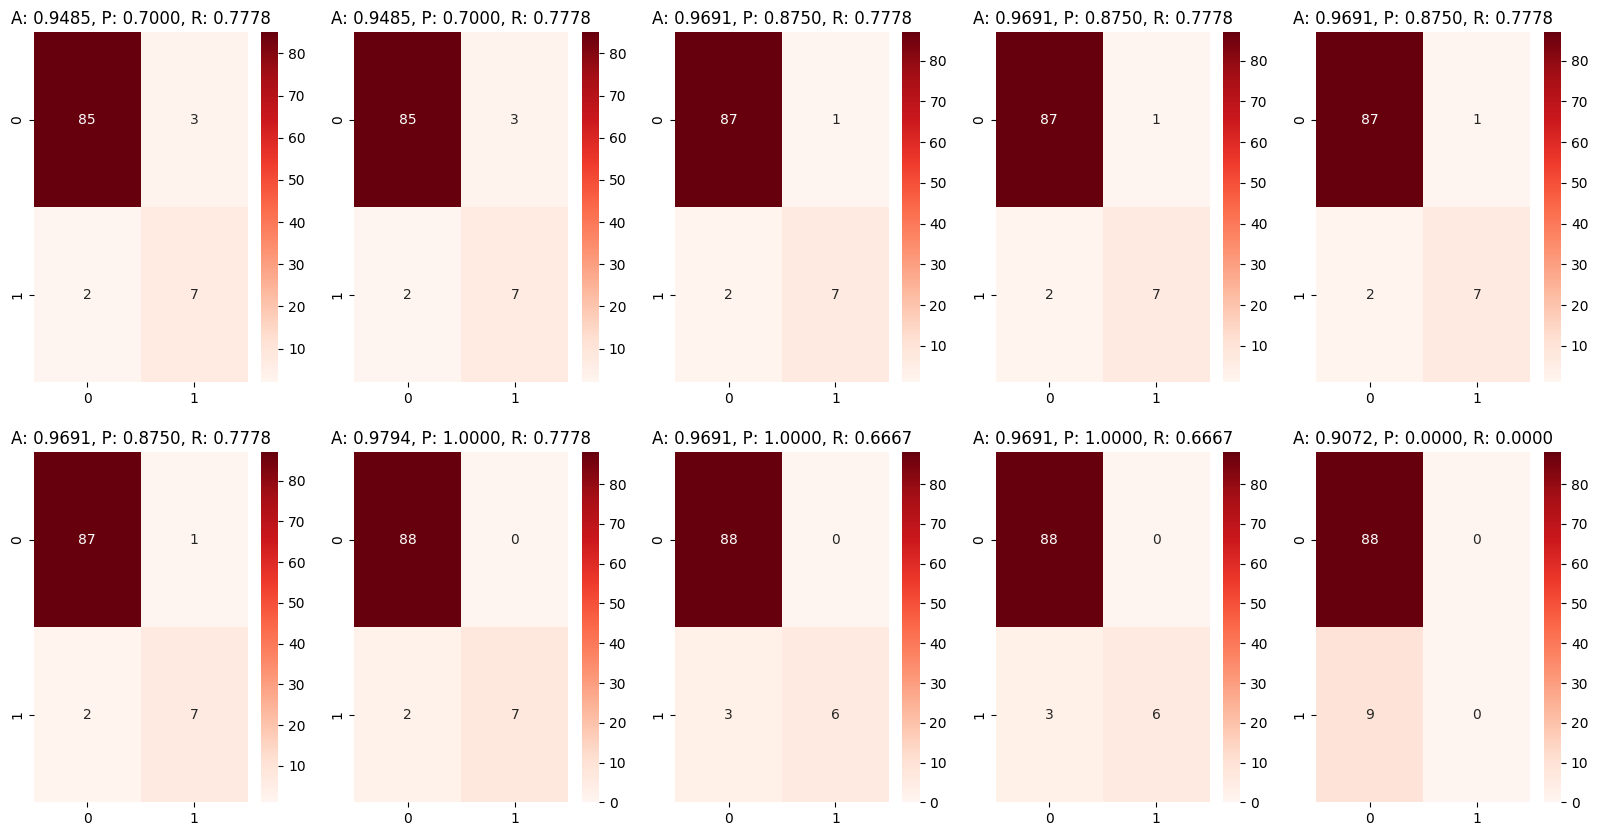

In [ ]:
def get_eval_by_threshold(y_test, pred_proba, thresholds):
    fig, axes = plt.subplots(nrows=2, ncols=5)
    fig.set_figwidth(20)
    fig.set_figheight(10)
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold, ax in zip(thresholds, axes.ravel()):
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba)

        custom_predict = binarizer.transform(pred_proba)
        get_clf_eval(y_test, custom_predict, ax)
        
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.01, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]
get_eval_by_threshold(y_test, lr_pred_proba_1, thresholds )

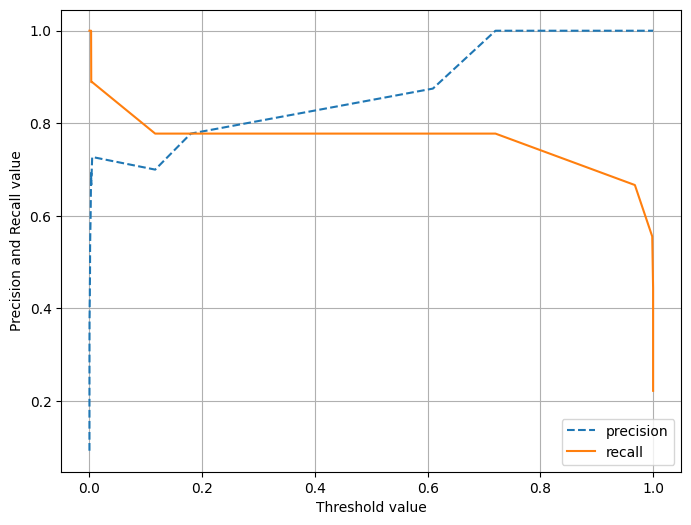

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, model.predict_proba(X_test)[:, 1] )

In [ ]:
def get_clf_eval(y_test, pred, ax=None):
  confusion = confusion_matrix( y_test, pred)
  precision = precision_score(y_test , pred)
  recall = recall_score(y_test , pred)
  accuracy = accuracy_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  hmap_ax = sns.heatmap(
    confusion,
    annot=True,
    cmap="Reds",
    ax=ax
  )
  
  hmap_ax.set_title('A: {0:.4f}, P: {1:.4f}\nR: {2:.4f}, F1 : {3:.4f}'.format(accuracy , precision ,recall, f1))
  
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]
pred_proba = model.predict_proba(X_test)
get_eval_by_threshold(y_test, lr_pred_proba_1, thresholds)

In [ ]:
#ROC curve
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, model.predict_proba(X_test)[:, 1] )

In [ ]:
from sklearn.metrics import roc_auc_score

pred_proba = model.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))